In [1]:
# %%
import pandas as pd
import os

dir_path = r"C:\Users\leere\OneDrive\Documents\Trading and Betting\Trackers\BF Bot Manager Monthly Records\ALL"

# Get list of all CSV files in the directory and subdirectories
all_files = []
for root, dirs, files in os.walk(dir_path):
    all_files += [os.path.join(root, f) for f in files if
                  f.endswith('.csv') and os.path.getsize(os.path.join(root, f)) > 0]

# Read CSV files into DataFrames
df_list = []
for file in all_files:
    try:
        df_list.append(pd.read_csv(file, encoding='utf-8'))  # Try utf-8 encoding first
    except UnicodeDecodeError:
        try:
            df_list.append(pd.read_csv(file, encoding='latin1'))  # Fallback to latin1 encoding
        except Exception as e:
            print(f"Error reading {file}: {e}")

# Concatenate DataFrames if any were read successfully
if df_list:
    combined_df = pd.concat(df_list, ignore_index=True)
else:
    combined_df = pd.DataFrame()


In [2]:
# Replace any occurrence of " backup" in the "Strategy" column with an empty string
combined_df['Strategy'] = combined_df['Strategy'].str.replace(' backup', '', regex=False)

strategies = ['Football - HT/FT Dutch']
filtered_df = combined_df[combined_df['Strategy'].isin(strategies)].copy()

In [3]:
filtered_df = filtered_df[filtered_df["Status"]=="SETTLED"].copy()
filtered_df

,Description,Selection,Bet type,Matched amount,Avg. price matched,Status,P/L,Strategy,Matched date,Settled date,Competition,Country code,Total matched on market,Loss rec. amount,BSP,Short description,Unmatched amount,Settle as win,Void bet,Settle as loss
124829,15:00 Bristol Rovers v Crawley Town\Half Time/...,Draw/Bristol Rovers,BACK,£0.25,6.0,SETTLED,-£0.25,Football - HT/FT Dutch,2024-11-16 14:59:19,2024-11-16 16:52:55,English League 1,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
124830,15:00 Bristol Rovers v Crawley Town\Half Time/...,Draw/Draw,BACK,£0.25,6.0,SETTLED,£1.25,Football - HT/FT Dutch,2024-11-16 14:59:19,2024-11-16 16:52:55,English League 1,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
124831,15:00 Bromley v Carlisle\Half Time/Full Time\D...,Draw/Draw,BACK,£0.50,6.0,SETTLED,£2.50,Football - HT/FT Dutch,2024-11-16 14:59:20,2024-11-16 16:56:12,English League 2,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
124832,15:00 Cambridge Utd v Barnsley\Half Time/Full ...,Draw/Barnsley,BACK,£0.27,5.7,SETTLED,-£0.27,Football - HT/FT Dutch,2024-11-16 14:59:20,2024-11-16 16:50:38,English League 1,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
124833,15:00 Cambridge Utd v Barnsley\Half Time/Full ...,Draw/Draw,BACK,£0.23,6.6,SETTLED,£1.29,Football - HT/FT Dutch,2024-11-16 14:59:20,2024-11-16 16:50:38,English League 1,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124944,14:00 Al Ain v Al Ahli\Half Time/Full Time\Al ...,Al Ain/Al Ahli,BACK,£0.03,26.0,SETTLED,-£0.03,Football - HT/FT Dutch,2024-11-25 13:58:20,2024-11-25 16:01:45,AFC Champions League,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
124945,14:00 Al Ain v Al Ahli\Half Time/Full Time\Dra...,Draw/Al Ahli,BACK,£0.13,6.6,SETTLED,£0.73,Football - HT/FT Dutch,2024-11-25 13:58:20,2024-11-25 16:01:45,AFC Champions League,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
124946,14:00 Al Ain v Al Ahli\Half Time/Full Time\Al ...,Al Ahli/Al Ain,BACK,£0.02,36.0,SETTLED,-£0.02,Football - HT/FT Dutch,2024-11-25 13:58:20,2024-11-25 16:01:45,AFC Champions League,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
124947,14:00 Al Ain v Al Ahli\Half Time/Full Time\Al ...,Al Ahli/Draw,BACK,£0.05,16.0,SETTLED,-£0.05,Football - HT/FT Dutch,2024-11-25 13:58:20,2024-11-25 16:01:45,AFC Champions League,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Ensure 'Settled date' is a datetime column
filtered_df.loc[:, 'Settled date'] = pd.to_datetime(filtered_df['Settled date'], errors='coerce')

# Order the DataFrame by the 'Settled date' column
filtered_df = filtered_df.sort_values(by='Settled date').reset_index(drop=True)
filtered_df

,Description,Selection,Bet type,Matched amount,Avg. price matched,Status,P/L,Strategy,Matched date,Settled date,Competition,Country code,Total matched on market,Loss rec. amount,BSP,Short description,Unmatched amount,Settle as win,Void bet,Settle as loss
0,15:00 Cambridge Utd v Barnsley\Half Time/Full ...,Draw/Barnsley,BACK,£0.27,5.7,SETTLED,-£0.27,Football - HT/FT Dutch,2024-11-16 14:59:20,2024-11-16 16:50:38,English League 1,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
1,15:00 Cambridge Utd v Barnsley\Half Time/Full ...,Draw/Draw,BACK,£0.23,6.6,SETTLED,£1.29,Football - HT/FT Dutch,2024-11-16 14:59:20,2024-11-16 16:50:38,English League 1,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
2,15:00 Bristol Rovers v Crawley Town\Half Time/...,Draw/Bristol Rovers,BACK,£0.25,6.0,SETTLED,-£0.25,Football - HT/FT Dutch,2024-11-16 14:59:19,2024-11-16 16:52:55,English League 1,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
3,15:00 Bristol Rovers v Crawley Town\Half Time/...,Draw/Draw,BACK,£0.25,6.0,SETTLED,£1.25,Football - HT/FT Dutch,2024-11-16 14:59:19,2024-11-16 16:52:55,English League 1,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
4,15:00 Bristol Rovers v Crawley Town\Half Time/...,Crawley Town/Draw,BACK,£0.21,17.5,SETTLED,-£0.21,Football - HT/FT Dutch,2024-11-16 14:59:59,2024-11-16 16:52:55,English League 1,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,14:00 Al Ain v Al Ahli\Half Time/Full Time\Al ...,Al Ahli/Draw,BACK,£0.05,16.0,SETTLED,-£0.05,Football - HT/FT Dutch,2024-11-25 13:58:20,2024-11-25 16:01:45,AFC Champions League,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
116,14:00 Al Ain v Al Ahli\Half Time/Full Time\Al ...,Al Ain/Draw,BACK,£0.05,16.5,SETTLED,-£0.05,Football - HT/FT Dutch,2024-11-25 13:58:20,2024-11-25 16:01:45,AFC Champions League,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
117,14:00 Al Ain v Al Ahli\Half Time/Full Time\Dra...,Draw/Al Ain,BACK,£0.09,9.2,SETTLED,-£0.09,Football - HT/FT Dutch,2024-11-25 13:58:20,2024-11-25 16:01:45,AFC Champions League,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
118,14:00 Al Ain v Al Ahli\Half Time/Full Time\Al ...,Al Ain/Al Ahli,BACK,£0.03,26.0,SETTLED,-£0.03,Football - HT/FT Dutch,2024-11-25 13:58:20,2024-11-25 16:01:45,AFC Champions League,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import pandas as pd

# Assuming `filtered_df` is your DataFrame
# First, convert the 'P/L' column to numeric, coercing non-numeric values to NaN
filtered_df['P/L'] = filtered_df['P/L'].replace('[£,]', '', regex=True).astype(float)
# filtered_df['P/L'] = pd.to_numeric(filtered_df['P/L'], errors='coerce')

# Now perform the operation, making sure to exclude NaN values
filtered_df.loc[filtered_df['P/L'].notna() & (filtered_df['P/L'] > 0), 'P/L'] *= 0.98


In [6]:
filtered_df

,Description,Selection,Bet type,Matched amount,Avg. price matched,Status,P/L,Strategy,Matched date,Settled date,Competition,Country code,Total matched on market,Loss rec. amount,BSP,Short description,Unmatched amount,Settle as win,Void bet,Settle as loss
0,15:00 Cambridge Utd v Barnsley\Half Time/Full ...,Draw/Barnsley,BACK,£0.27,5.7,SETTLED,-0.2700,Football - HT/FT Dutch,2024-11-16 14:59:20,2024-11-16 16:50:38,English League 1,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
1,15:00 Cambridge Utd v Barnsley\Half Time/Full ...,Draw/Draw,BACK,£0.23,6.6,SETTLED,1.2642,Football - HT/FT Dutch,2024-11-16 14:59:20,2024-11-16 16:50:38,English League 1,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
2,15:00 Bristol Rovers v Crawley Town\Half Time/...,Draw/Bristol Rovers,BACK,£0.25,6.0,SETTLED,-0.2500,Football - HT/FT Dutch,2024-11-16 14:59:19,2024-11-16 16:52:55,English League 1,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
3,15:00 Bristol Rovers v Crawley Town\Half Time/...,Draw/Draw,BACK,£0.25,6.0,SETTLED,1.2250,Football - HT/FT Dutch,2024-11-16 14:59:19,2024-11-16 16:52:55,English League 1,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
4,15:00 Bristol Rovers v Crawley Town\Half Time/...,Crawley Town/Draw,BACK,£0.21,17.5,SETTLED,-0.2100,Football - HT/FT Dutch,2024-11-16 14:59:59,2024-11-16 16:52:55,English League 1,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,14:00 Al Ain v Al Ahli\Half Time/Full Time\Al ...,Al Ahli/Draw,BACK,£0.05,16.0,SETTLED,-0.0500,Football - HT/FT Dutch,2024-11-25 13:58:20,2024-11-25 16:01:45,AFC Champions League,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
116,14:00 Al Ain v Al Ahli\Half Time/Full Time\Al ...,Al Ain/Draw,BACK,£0.05,16.5,SETTLED,-0.0500,Football - HT/FT Dutch,2024-11-25 13:58:20,2024-11-25 16:01:45,AFC Champions League,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
117,14:00 Al Ain v Al Ahli\Half Time/Full Time\Dra...,Draw/Al Ain,BACK,£0.09,9.2,SETTLED,-0.0900,Football - HT/FT Dutch,2024-11-25 13:58:20,2024-11-25 16:01:45,AFC Champions League,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
118,14:00 Al Ain v Al Ahli\Half Time/Full Time\Al ...,Al Ain/Al Ahli,BACK,£0.03,26.0,SETTLED,-0.0300,Football - HT/FT Dutch,2024-11-25 13:58:20,2024-11-25 16:01:45,AFC Champions League,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN


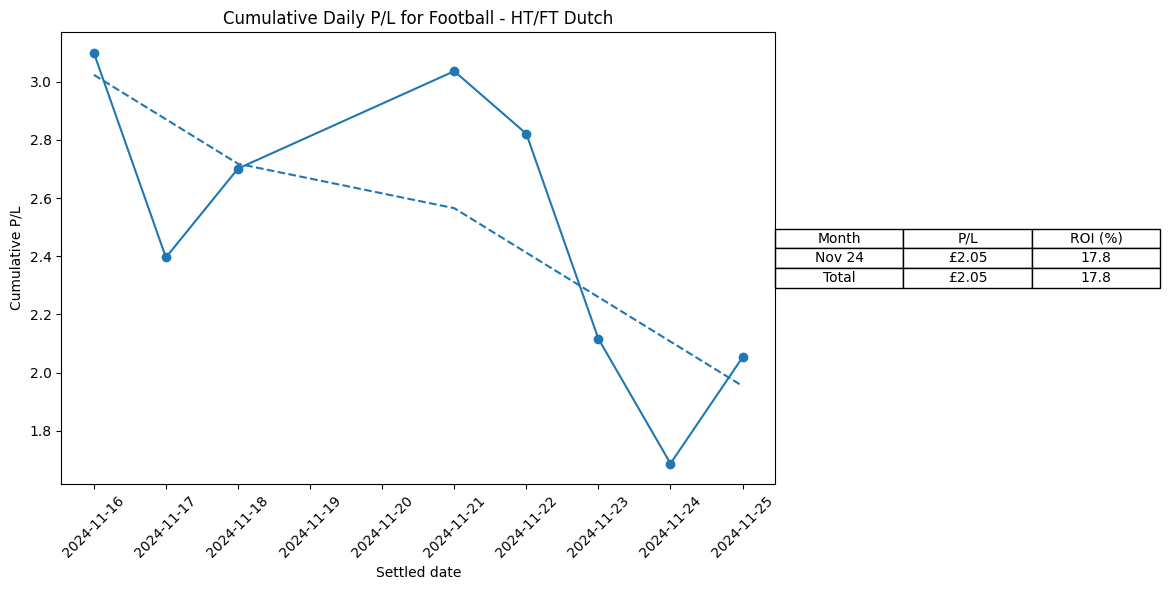

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Create a copy of the DataFrame to avoid changing the original
grouped_df = filtered_df.copy()

# Convert P/L and Matched amount columns to numeric
grouped_df['P/L'] = grouped_df['P/L'].replace('[£,]', '', regex=True).astype(float)
grouped_df['Matched amount'] = grouped_df['Matched amount'].replace('[£,]', '', regex=True).astype(float)

# Ensure 'Settled date' is a datetime column and extract the date part only
grouped_df['Settled date'] = pd.to_datetime(grouped_df['Settled date'], errors='coerce').dt.date

# Group by 'Strategy' and 'Settled date' and calculate daily P/L
daily_pl_df = grouped_df.groupby(['Strategy', 'Settled date'])['P/L'].sum().reset_index()

# Calculate cumulative P/L by day for each strategy
daily_pl_df['Cumulative P/L'] = daily_pl_df.groupby('Strategy')['P/L'].cumsum()

# Plot cumulative P/L for each strategy with trendlines and different colors
strategies = daily_pl_df['Strategy'].unique()

colors = plt.get_cmap('tab10')  # Get a color map for different strategies

for i, strategy in enumerate(strategies):
    strategy_df = daily_pl_df[daily_pl_df['Strategy'] == strategy]

    # Monthly P/L and ROI calculation
    monthly_df = grouped_df[grouped_df['Strategy'] == strategy].copy()
    monthly_df['Month'] = monthly_df['Settled date'].apply(lambda x: x.strftime('%b %y')) # Change format to "Oct 24"
    monthly_df['Month'] = pd.to_datetime(monthly_df['Month'], format='%b %y')
    monthly_summary = monthly_df.groupby('Month').agg({
        'P/L': 'sum',
        'Matched amount': 'sum'
    }).reset_index()
    monthly_summary['ROI'] = (monthly_summary['P/L'] / monthly_summary['Matched amount']) * 100

    # Calculate total ROI for all months
    total_months_pl = monthly_summary['P/L'].sum()
    total_months_matched = monthly_summary['Matched amount'].sum()
    total_months_roi = (total_months_pl / total_months_matched) * 100

    # Sort months in ascending order
    monthly_summary = monthly_summary.sort_values('Month')

    # Format P/L with '£' and round to 2 decimal places. Round ROI to 1 decimal place.
    monthly_summary['P/L'] = monthly_summary['P/L'].apply(lambda x: f"£{x:.2f}")
    monthly_summary['ROI'] = monthly_summary['ROI'].round(1)
    monthly_summary['Month'] = monthly_summary['Month'].dt.strftime('%b %y')

    # Add "Total" row for total P/L and ROI
    total_row = pd.DataFrame({
        'Month': ['Total'],
        'P/L': [f"£{total_months_pl:.2f}"],
        'Matched amount': [f"£{total_months_matched:.2f}"],
        'ROI': [total_months_roi.round(1)]
    })
    monthly_summary = pd.concat([monthly_summary, total_row], ignore_index=True)

    fig, ax1 = plt.subplots(figsize=(12, 6))  # Set the figure size for better layout
    ax1.plot(strategy_df['Settled date'], strategy_df['Cumulative P/L'], marker='o', color=colors(i))  # Use 'o' marker

    # Trendline
    z = np.polyfit(np.arange(len(strategy_df)), strategy_df['Cumulative P/L'], 1)
    p = np.poly1d(z)
    ax1.plot(strategy_df['Settled date'], p(np.arange(len(strategy_df))), "--", color=colors(i))

    ax1.set_title(f'Cumulative Daily P/L for {strategy}')
    ax1.set_xlabel('Settled date')
    ax1.set_ylabel('Cumulative P/L')
    ax1.tick_params(axis='x', rotation=45)

    # Table with monthly P/L, ROI, and Total P/L and ROI
    table_data = monthly_summary[['Month', 'P/L', 'ROI']].values
    col_labels = ['Month', 'P/L', 'ROI (%)']
    table = plt.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='right', colWidths=[0.15]*3)
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

    plt.tight_layout()
    plt.subplots_adjust(right=0.65)  # Adjust layout to make room for the table
    plt.show()